Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5521 - loss: 0.9812 - val_accuracy: 0.7917 - val_loss: 0.8400
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.7966 - val_accuracy: 0.7917 - val_loss: 0.6671
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8229 - loss: 0.6132 - val_accuracy: 0.8333 - val_loss: 0.5144
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.4612 - val_accuracy: 0.9167 - val_loss: 0.4130
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8958 - loss: 0.3677 - val_accuracy: 0.9167 - val_loss: 0.3588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9333 - loss: 0.2882
Test Loss: 0.28824007511138916
Test Accuracy: 0.9333333373069763


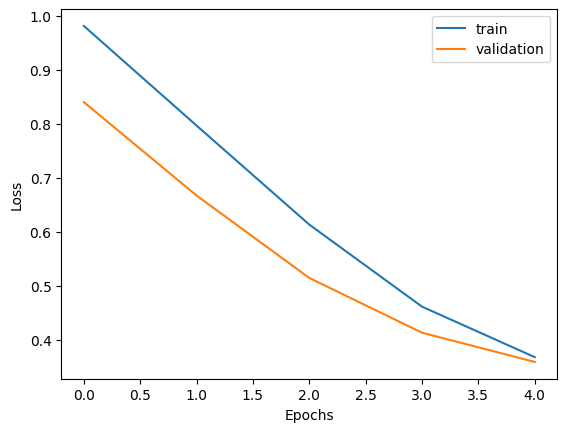

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler,LabelEncoder
import plotly.express as px
import tensorflow as tf

df=sns.load_dataset('iris')
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

X=df.drop('species',axis=1)
y=df['species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,
                          activation='relu',
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,
                          activation='relu'),                 
    tf.keras.layers.Dense(3,activation='softmax'),
             
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(X_train,y_train,
               epochs=5,
               validation_split=0.2,
               batch_size=3,
               verbose=1  
    )


loss=model.evaluate(X_test,y_test,verbose=1)

print('Test Loss:', loss[0])
print('Test Accuracy:', loss[1])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()


In [10]:
print(y_train[:5])
print(y_train.dtype)

22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object
object


In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
fig=px.box(df,x='sepal_width')
fig.show()